![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 4h17m52s].png](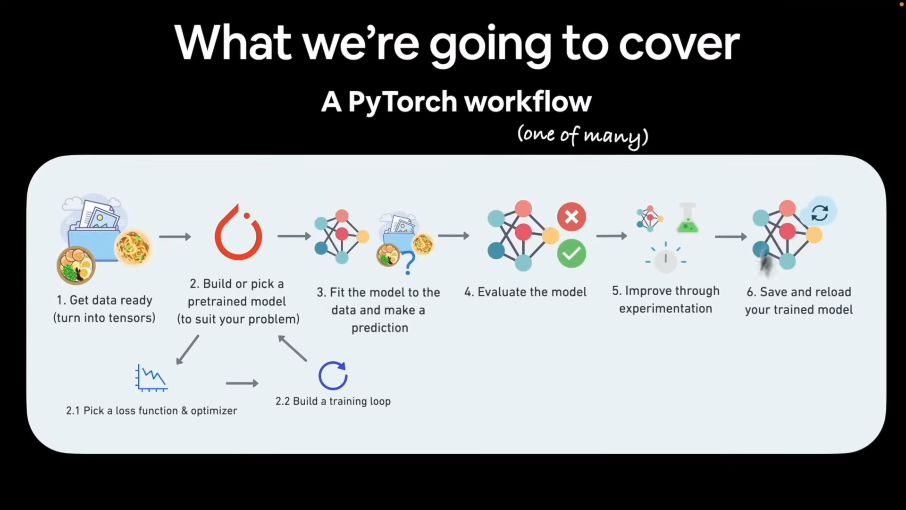)

# PyTorch end-to-end workflow

In [37]:
what_were_covering = {1 : "data(preparing and loading)",
                      2 : "build model",
                      3 : "fitting the model to the data(training)",
                      4 : "Making prredictions and Evaluating the model",
                      5 : "saving and loading the model",
                      6 : "Putting it all together"}
what_were_covering

{1: 'data(preparing and loading)',
 2: 'build model',
 3: 'fitting the model to the data(training)',
 4: 'Making prredictions and Evaluating the model',
 5: 'saving and loading the model',
 6: 'Putting it all together'}

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check pytoprch version
torch.__version__

'2.1.0+cu121'

## Data (preparing and loading)

Data can be almost anything,... in machine learning
* Excel Spreadsheet
* Images of any kind
* Video(YouTube has lots of data)
* Audio like songs or products
* DNA
* Text

Machine learning is a game of twp parts:
1. Get data into numerical representation
2. Build a model to learn pattern in the numerical representation.


![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 4h30m03s].png](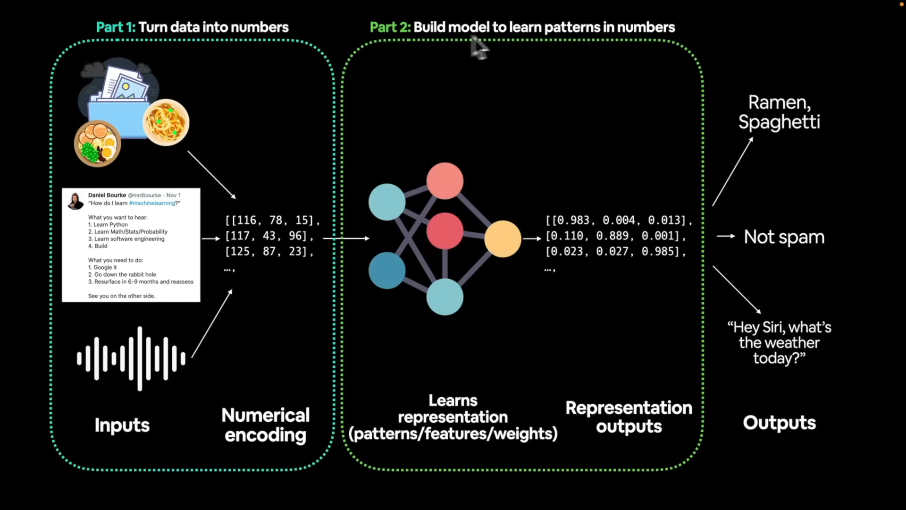)

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 4h31m12s].png](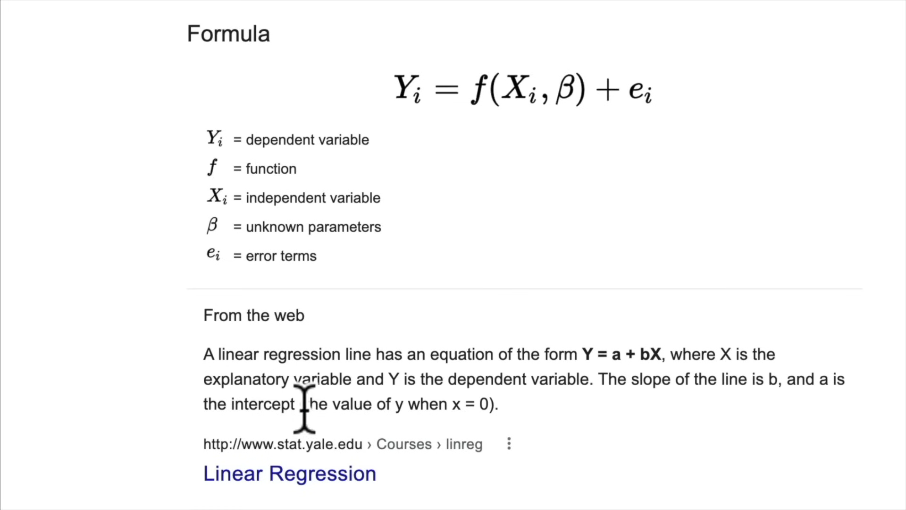)

In [2]:
# create *known* parmeters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # [4] => [4,1] dimension
Y = weight * X + bias

In [3]:
X[:10]  # first 10 columns all the rows

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [4]:
Y[:10]  # first 10 columns all the rows

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [5]:
len(X)

50

In [6]:
len(Y)

50

Splitting the data into training and testing sets.

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 4h38m13s].png](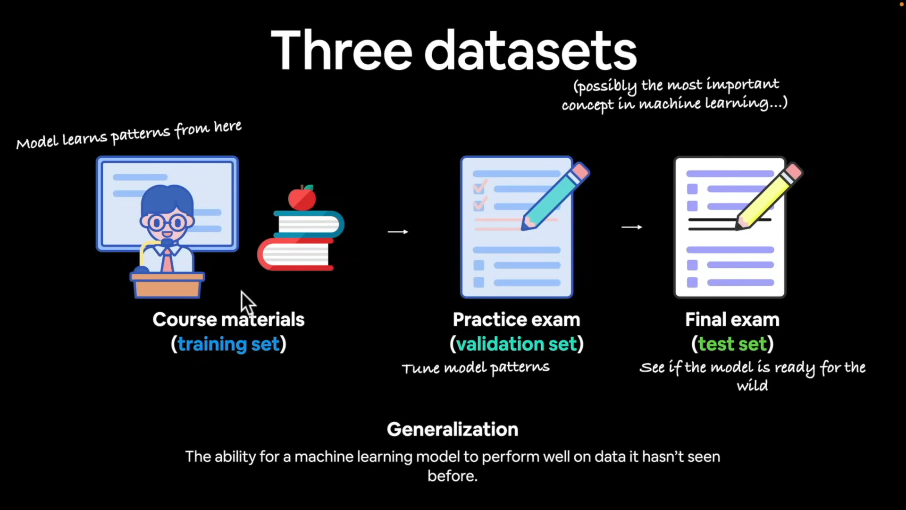)

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 4h40m55s].png](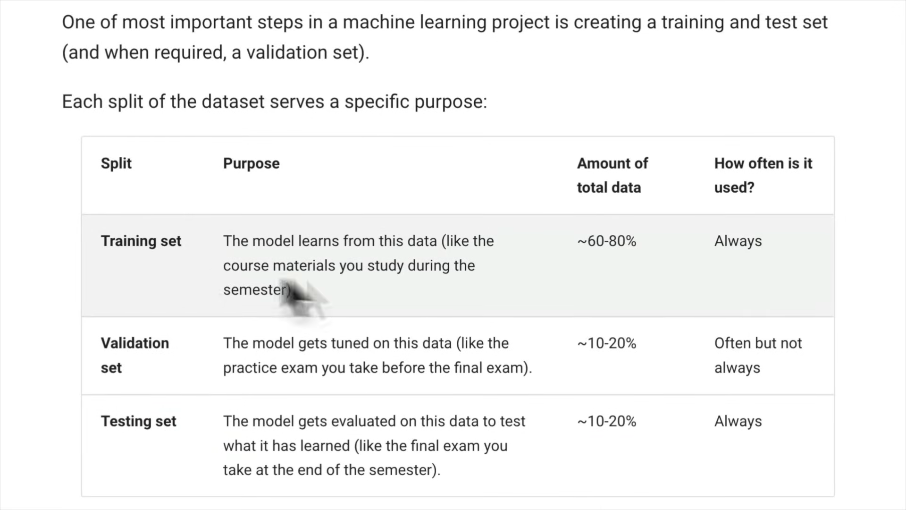)

In [7]:
# basic sustom splitting into training and testing

train_split = int(0.8 * len(X))
train_split

40

In [8]:
X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[ train_split : ], Y[ train_split : ]

In [9]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data

This is where the data explorer's motto comes in!!

"Visualize, visualize, visualize"

In [10]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):

  """
  plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")

  # Are thre prediction?
  if predictions is not None:
    # plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size" : 14})


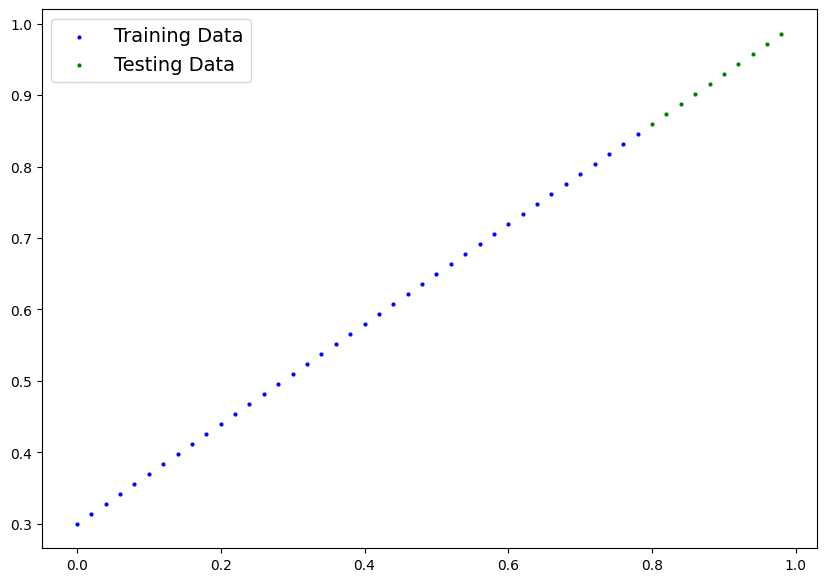

In [11]:
plot_prediction()

green dots are the ideal outputs. Not the predicted. They will be in gray. We will do it right now

# Building out first model : linear regression model

In [12]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # class inherited from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,  # tensor of shape(1,) : One dimensional tensor with
                                           requires_grad = True, # by default true
                                           dtype = torch.float)) # by default = float = float32
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float32))

  # forward method to define the computation in the model
  def forward(self, x:torch.Tensor)-> torch.Tensor : # x is the input data
    return self.weights * x + self.bias # that is a simple linear regression


What our model does:
* start with random values(weight and bias)
* Look at training data and adjust the random values to better represent(or get closer to) the ideal values (the weights and bias values we used to create the data)

How does the model do so ?

1. Gradient Descent
2. Backpropagation

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 5h11m23s].png](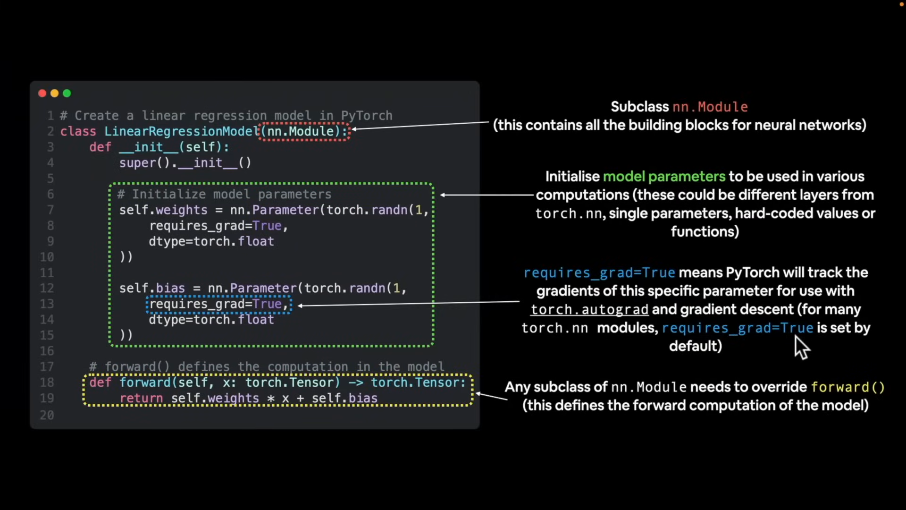)

https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=Q-V2ZmcckHKhXLrF

## Pytorch Model building essentials

* torch.nn - contains all the building blocks for computational graph ( A neural network can be considered a computational graph )
* torch.nn.Parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.module - The base class for all neural network module, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizer in Pytorch live, that will help in gradiant descent.
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines, what happens in the forward computation.

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 5h17m56s].png](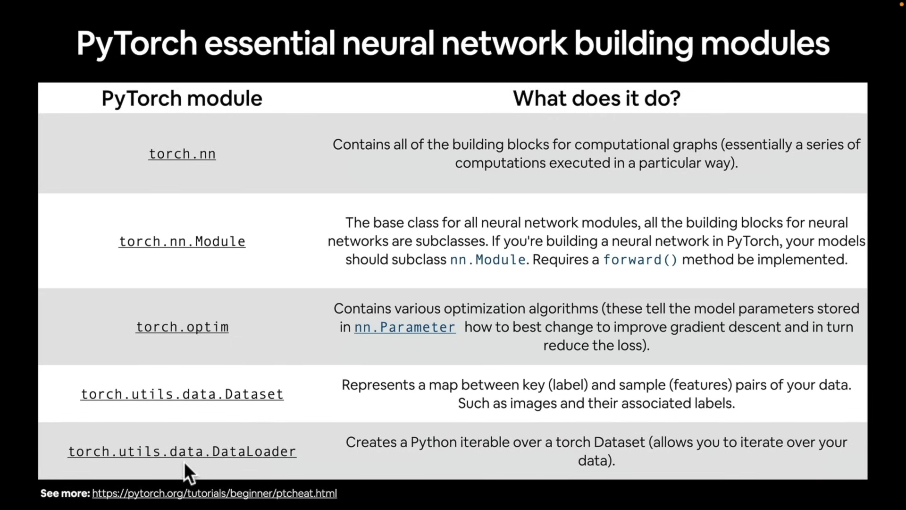)

# Checking out the internals of our model

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 5h21m38s].png](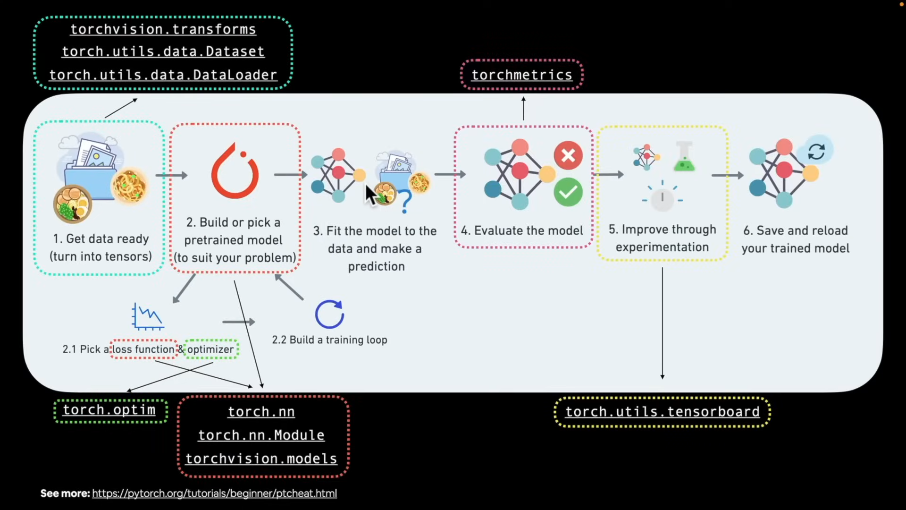)

In [13]:
# Buiding first pytorch model.
import torch

In [14]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model(this is a subclass of nn.Module)
model_0 = LinearRegressionModel() # upar ke function se
model_0

LinearRegressionModel()

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.parameters

<bound method Module.parameters of LinearRegressionModel()>

In [17]:
model_0.parameters()

<generator object Module.parameters at 0x7ade4e220200>

In [18]:
torch.randn(1)

tensor([0.2345])

In [19]:
torch.randn(1)

tensor([0.2303])

In [20]:
torch.randn(2)

tensor([-1.1229, -0.1863])

In [21]:
torch.manual_seed(4)
torch.randn(1)  # everytime same value, since same manual seed.

tensor([-1.6053])

In [22]:
model_0.state_dict()  # gives in form of dictionary

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [23]:
# making predictions with model using torch.inference_mode()

In [24]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

poor outout, since random parameters used kiya, there has not been any training yet

In [25]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

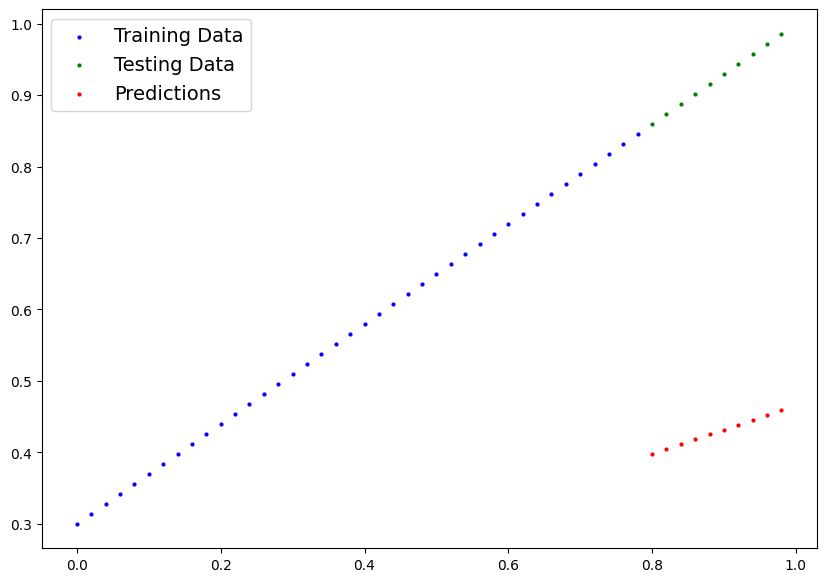

In [26]:
plot_prediction(predictions=y_preds)

Ideal model should have red dots over the green dots

torch.inference_mode() is a context manager, which is happens when making predictions.

Absolutely! Here's a breakdown of what the code `with torch.inference_mode(): y_preds = model_0(X_test)` does in PyTorch:

**Components:**

* **`torch.inference_mode()`:** This context manager signals PyTorch that you're about to perform inference (making predictions) with your model.  It has a few key benefits:
    * **Speed:**  Disables certain computationally-expensive features not necessary during inference, such as tracking gradients, leading to potential performance improvement.
    * **Accuracy:** In some cases, modules like Dropout and Batch Normalization behave differently during training and inference. This context manager ensures appropriate behavior for inference.
* **`model_0`:** This presumably represents your trained deep learning model.
* **`X_test`:** This is your input data, likely a set of features that your model will use to generate predictions.
* **`y_preds`:**  This variable will store the predictions produced by your model after it has processed `X_test`.

**Functionality**

1. **Context is Key:** The `with` statement creates a temporary context where PyTorch's `inference_mode` is activated.  

2. **Inference Time:** Inside this context, you execute the line `y_preds = model_0(X_test)`. Here:
    * Your model (`model_0`) takes the input data (`X_test`) and processes it.
    * It generates predictions, which get stored in the `y_preds` variable.

**Why use `torch.inference_mode()`?**

* **Efficiency:**  Since you're not training your model here, it's safe to disable gradient calculations and other training-specific behaviors, often resulting in faster inference.
* **Consistency:** It ensures your model uses its inference-time behavior, which might differ from training mode for certain layers.

**Let me know if you'd like clarification on specific aspects or a more detailed example!**


In [27]:
# we could also just go with
y_pred = model_0(X_test)

y_preds
# no inference, no context managaer here
# preveously , with inference mode: what it do : it turns off gradiant tracking.

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

The main difference between the two code snippets lies in how they handle **inference mode** in PyTorch:

**1. With `torch.inference_mode()`:**

```python
with torch.inference_mode():
  y_preds = model_0(X_test)
```

* **Explicitly activates inference mode:** This code explicitly tells PyTorch to enter inference mode using the `with torch.inference_mode():` context manager.
* **Potential performance benefits:** This mode can potentially improve **inference speed** by:
    * Disabling gradient calculation (not needed for making predictions).
    * Adjusting certain module behaviors (e.g., Dropout, BatchNorm) for inference.
* **Clarity and consistency:** Using the context manager emphasizes that you're performing inference and promotes consistent behavior, especially if your model has specific training/inference differences.

**2. Without `torch.inference_mode()`:**

```python
y_pred = model_0(X_test)
y_preds
```

* **Implicit inference mode:** This code doesn't explicitly call `torch.inference_mode()`. PyTorch might still enter inference mode **implicitly** based on factors like the presence of `requires_grad=False` flags in your model.
* **Potential performance impact:** In some cases, not explicitly entering inference mode might lead to **slower inference** due to unnecessary calculations.
* **Potential inconsistency:** The model behavior might differ slightly from explicit inference mode for specific modules.

**Choosing between the two:**

* **Generally recommended:** It's considered **good practice** to explicitly activate inference mode using `torch.inference_mode()` for clarity, consistency, and potential performance gains.
* **Performance impact:** If speed is a critical concern, you can benchmark both approaches to see if the explicit mode makes a significant difference in your specific case.

In summary, while both snippets can achieve making predictions, using `torch.inference_mode()` is generally recommended for clarity, consistency, and potential performance optimizations.

# to do similar to `with torch.inference_mode()` ; use torch.no_grad(); however `torch.inference_mode()` is preferred

Previously our model performed very poorly, because out model was initialized with random parameters. And there has not been any training yet.

## Training model

The whole idea of training for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

or in other words, from some poor representation of data top good representation of the data.

One way to measure how poor or how wrong our model predictions are is to use a loos function.

* Note : loss function may also be called cost function or criterion in differenct area. For our case, we are going to refer to it as a loss function

* **Loss Function** : A function to measure how wrong your model's prediction are with respect to the ideal outputs. Lower is better
* **Optimizer** : Takes into account the loos of the model and adjusts the model's parameters(e.g. weights, bias) to improve the loss function.

And specifically for pytorch, we need
* A training loop
* A testing loop

In [28]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**what is the difference between list(model_0.parameters()) and model_0.state_dict()**

Both `list(model_0.parameters())` and `model_0.state_dict()` provide information about the internal state of your PyTorch model, but they serve different purposes:

**1. `list(model_0.parameters())`:**

* **Contains:** This returns a **list** consisting of all **trainable parameters** (weights and biases) in your model. These are the parameters that get **updated during training** to optimize the model's performance.
* **Focus:** Primarily focused on **trainable parameters**, excluding other elements of the model's state.
* **Use cases:**
    * Accessing specific parameters for manipulation or analysis.
    * Iterating over parameters for manual updates or gradient calculations (less common in modern PyTorch training).

**2. `model_0.state_dict()`:**

* **Contains:** This returns a **Python dictionary** containing the entire **state of the model**. This includes:
    * **Trainable parameters (weights and biases)::** Same as `list(model_0.parameters())`.
    * **Buffer elements:** These are non-trainable parameters that might be used internally by the model (e.g., running averages in Batch Normalization).
    * **Optimizer state:** Stores information about the optimizer used for training, relevant for resuming training after interruption.

**Key differences:**

| Feature        | `list(model_0.parameters())`                 | `model_0.state_dict()`                                 |
|----------------|----------------------------------------------|--------------------------------------------------------|
| Content        | Trainable parameters (weights and biases)     | Entire model state (parameters, buffers, optimizer state) |
| Format          | List                                         | Dictionary                                            |
| Use cases       | Accessing/manipulating trainable parameters     | Saving/loading entire model state, resuming training     |

**Choosing the right approach:**

* Use `list(model_0.parameters())` when you specifically need to access or manipulate the **trainable parameters** of your model.
* Use `model_0.state_dict()` when you need to **save and load the entire model state**, including parameters, buffers, and optimizer information, for tasks like:
    * Saving and loading checkpoints during training.
    * Deploying your trained model for inference.

I hope this explanation clarifies the distinction between these two common methods for accessing the state of your PyTorch model!

**Loss Functions**

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 5h51m44s].png](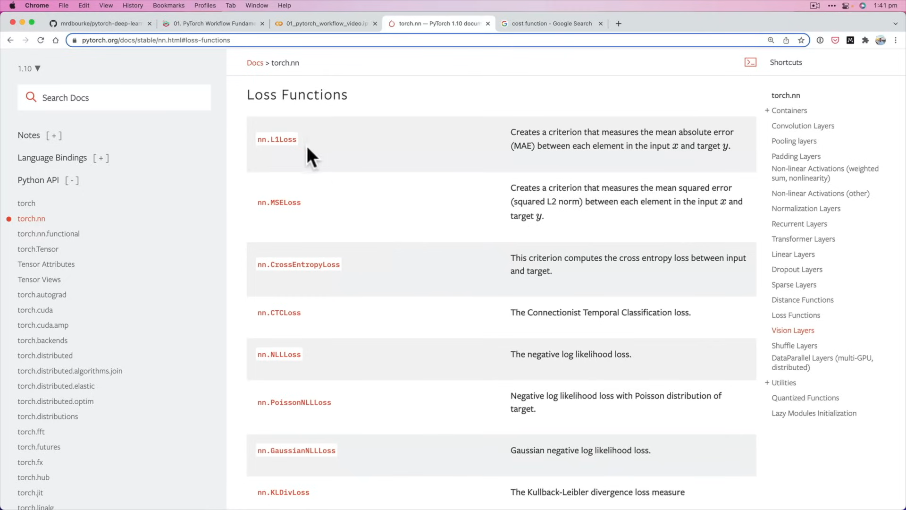)

L1Loss, MSELoss : are used in regression.

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 5h53m23s].png](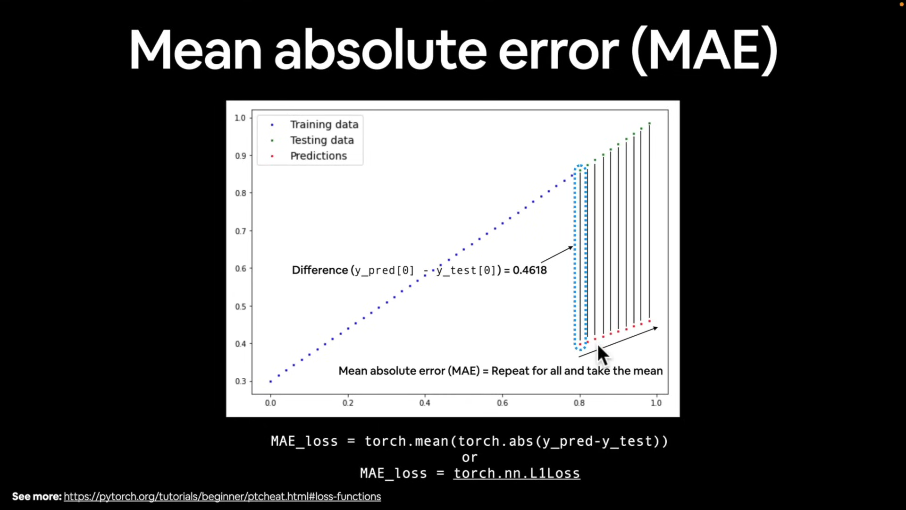)

In [30]:
# setup a loss function

loss_fn = nn.L1Loss()

In [31]:
loss_fn

L1Loss()

In [32]:
# setup an optimizer : try and error ADAM, SGD, etc : Adjust model parameters to reduce the loss

optimizer = torch.optim.SGD(params=model_0.parameters(), # params = parameters you'd like to optimize
                            lr = 0.01) # lr = learning_rate = possibly the most important hyperparameter you can set

# one example of loss algo : gradiant descent:( w_new = w_previous - LR*[d(loss)/d(w)] )
# cnhage in parameters is directly proportional to LR size

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 6h03m45s].png](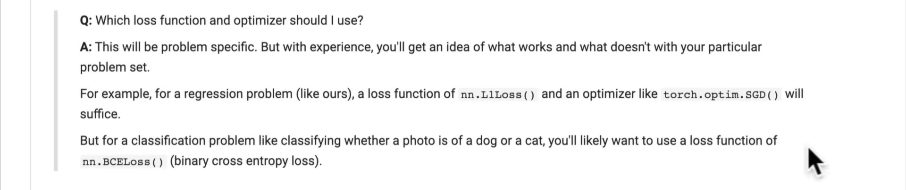)

# Building a Training Loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data.
1. Forward Pass(this involves data moving through our models's `forward()` function to make predictions on data : just data moving prom input to output layer is forward pass. -> also called as forward propagation.
2. Calculate the loss (compare forward pass predictions to the ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of loss function with respect to each of the parameters separately.(**backpropagation**)
5. Optimizer Step - use the optizer to adjust our model's parameter to try and improve the loss(**gradient descent**)



gradient descent = make the gradeint 0 or extreme small.

In [101]:
# An epoch is one loop through the data
epochs = 100 # A hyperparameter


### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training loop
  model_0.train() # train mode in pytorch sets all paramaters that require gradients

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"loss : {loss}")

  # 3. optimizer zero grad : setting previous gradients to 0
  optimizer.zero_grad()

  # 4. Perform backpropagation (calculating gradients) on the loss with respect to all the parameters of the model having requires_grad = True
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero it by the above step 3 for the next iteration of the loop

  print(model_0.state_dict())

loss : 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
loss : 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
loss : 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
loss : 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
loss : 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
loss : 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
loss : 0.20919232070446014
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
loss : 0.1976713240146637
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
loss : 0.18615034222602844
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
loss : 0.1746293306350708
OrderedDict([('weights', tensor([0.3874])), ('bias', tensor([0.2588]))])
loss

Explanation of the last three 3,4,5 steps:

The code snippet you provided demonstrates three crucial steps in the training process of a deep learning model:

**1. Optimizer Zero Grad (`optimizer.zero_grad()`):**

* **Function:** This line resets the gradients of all **parameters** that are tracked by the optimizer.
* **Importance:** Gradients from previous iterations accumulate by default in PyTorch. To avoid using outdated gradients for the current iteration, we explicitly reset them to zero before each backpropagation step.

**2. Backpropagation (`loss.backward()`):**

* **Function:** This line triggers the **backward pass** of the computational graph, calculating the gradients of the **loss function** with respect to all **parameters that have `requires_grad=True`**.
* **Process:** During backpropagation, the chain rule is applied to efficiently compute the contribution of each parameter to the final loss.

**3. Optimizer Step (`optimizer.step()`):**

* **Function:** This line instructs the optimizer to take a **step in the direction** that minimizes the **loss function**.
* **Mechanism:** The optimizer uses the **previously calculated gradients** (from the backpropagation step) to update the **values of the parameters** according to its specific algorithm (e.g., Stochastic Gradient Descent).

**In summary, these steps work together to achieve parameter updates during training:**

1. **Reset gradients:** Ensures we use the correct gradients for the current iteration.
2. **Backpropagate:** Calculates how much each parameter contributes to the loss.
3. **Step optimizer:** Adjusts the parameters based on the calculated gradients, aiming to minimize the loss.

These steps are typically repeated for a certain number of epochs (iterations over the entire training data) to gradually improve the model's performance.

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 906x510 - 6h23m27s].png](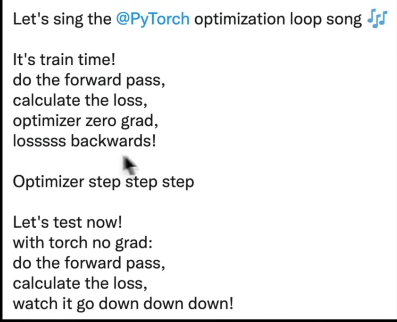)

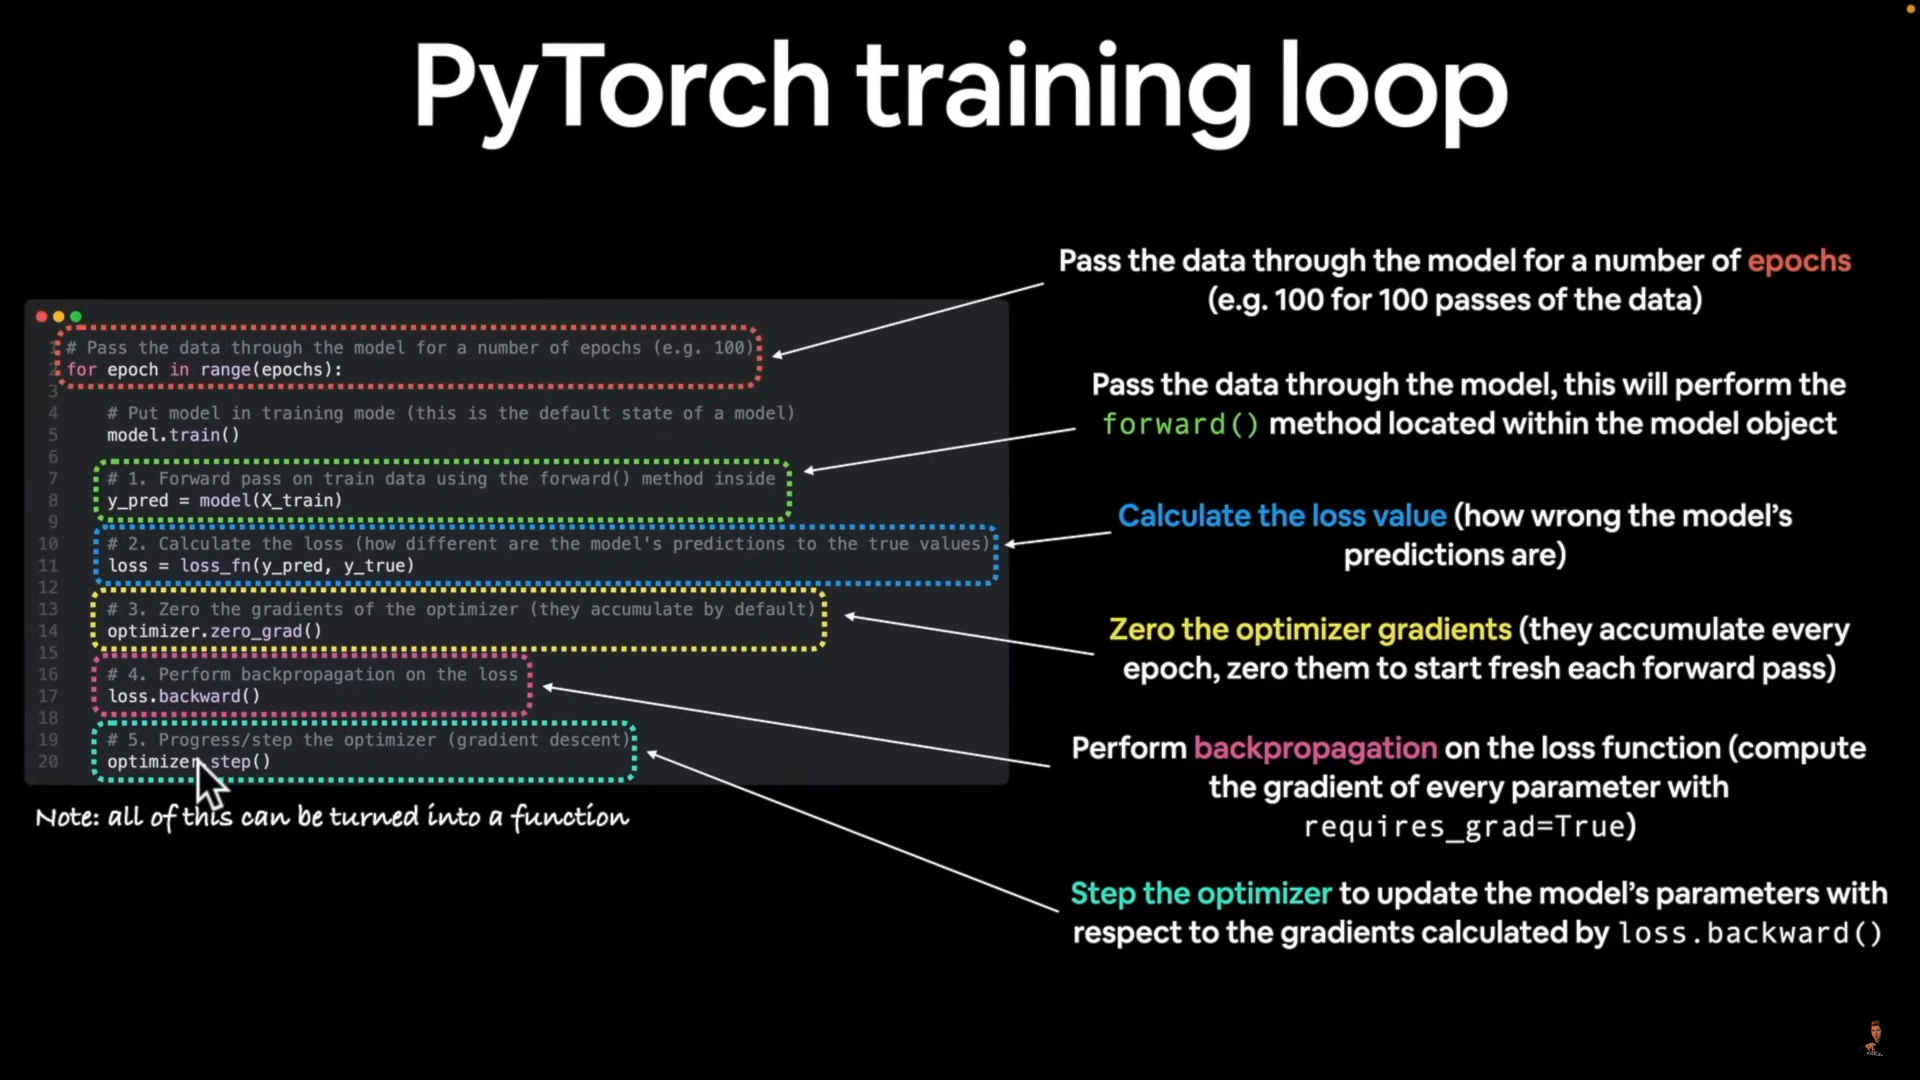

In [93]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [98]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

minimize the gradient = minimize the lost function.

In [102]:
# prediction after 100 epochs
with torch.inference_mode():
  y_pred_new = model_0(X_test)

model_0.state_dict()

OrderedDict([('weights', tensor([0.5834])), ('bias', tensor([0.3488]))])

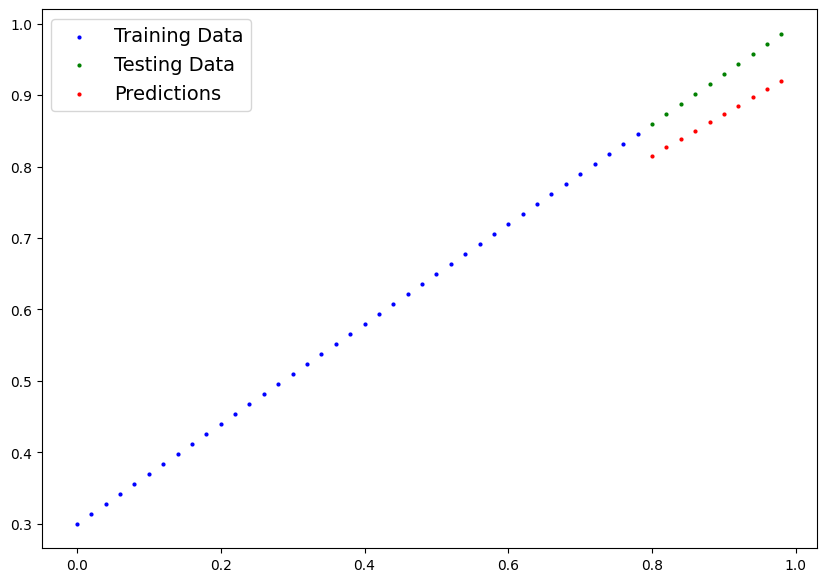

In [104]:
plot_prediction(predictions=y_pred_new)

Very much improved !!!!

## Testing bhi add krne pr :
in the same function, we can do it separately as well

Better to start with new instance of model, then run the below

In [35]:
# An epoch is one loop through the data
epochs = 100 # A hyperparameter

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training loop
  model_0.train() # train mode in pytorch sets all paramaters that require gradients

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"loss : {loss}")

  # 3. optimizer zero grad : setting previous gradients to 0
  optimizer.zero_grad()

  # 4. Perform backpropagation (calculating gradients) on the loss with respect to all the parameters of the model having requires_grad = True
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero it by the above step 3 for the next iteration of the loop

  ## Testing
  model_0.eval() # turns off different settings in the model not needed for the evaluation/testing dropout, batch normalization layer)

  with torch.inference_mode(): # turns off gradient tracking and something more
  # with torch.no_grad() : in older pytorch codes, still valid , but above is preferred
    # 1. do the forward pass : that is nothing but test predictions
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch%10 == 0:
    print(f"epoch: {epoch} | Loss : {loss} | test loss: {test_loss}")

# print(model_0.state_dict())

loss : 0.28983935713768005
epoch: 0 | Loss : 0.28983935713768005 | test loss: 0.4541231691837311
loss : 0.2783183455467224
loss : 0.26679736375808716
loss : 0.2552763521671295
loss : 0.24375534057617188
loss : 0.23223432898521423
loss : 0.22071333229541779
loss : 0.20919232070446014
loss : 0.1976713240146637
loss : 0.18615034222602844
loss : 0.1746293306350708
epoch: 10 | Loss : 0.1746293306350708 | test loss: 0.3194132149219513
loss : 0.16310831904411316
loss : 0.1515873372554779
loss : 0.14006635546684265
loss : 0.1285453587770462
loss : 0.11702437698841095
loss : 0.1060912236571312
loss : 0.09681284427642822
loss : 0.08908725529909134
loss : 0.08227583020925522
loss : 0.07638873159885406
epoch: 20 | Loss : 0.07638873159885406 | test loss: 0.19773726165294647
loss : 0.07160007208585739
loss : 0.06747635453939438
loss : 0.06395438313484192
loss : 0.06097004935145378
loss : 0.05845819041132927
loss : 0.05635259300470352
loss : 0.0545857772231102
loss : 0.053148526698350906
loss : 0.051

In [36]:
with torch.inference_mode():
  y_pred_new_new = model_0(X_test)

model_0.state_dict()

OrderedDict([('weights', tensor([0.5818])), ('bias', tensor([0.3498]))])

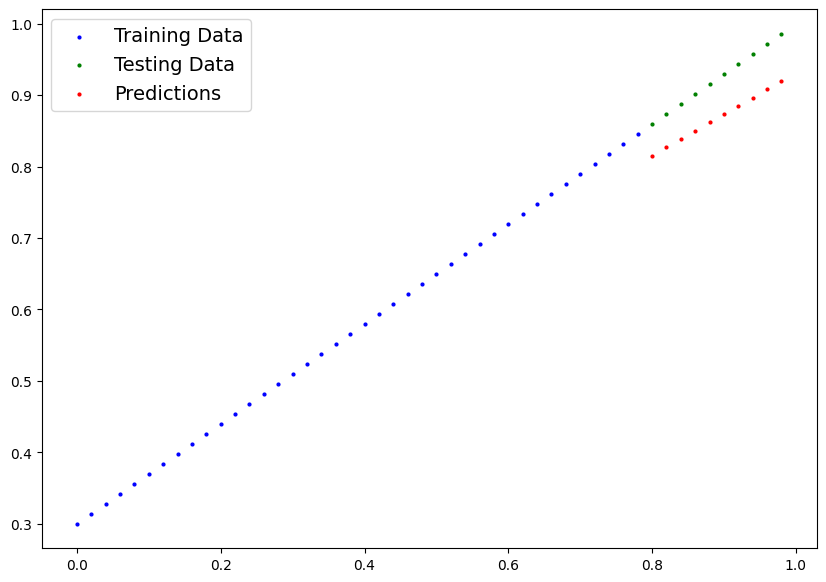

In [38]:
plot_prediction(predictions=y_pred_new_new)

loss : 0.02376994863152504
epoch: 0 | Loss : 0.02376994863152504 | test loss: 0.05494590476155281
loss : 0.02342480979859829
loss : 0.023080935701727867
loss : 0.022739607840776443
loss : 0.022391926497220993
loss : 0.022054409608244896
loss : 0.02170540764927864
loss : 0.021366719156503677
loss : 0.021020207554101944
loss : 0.020677709951996803
loss : 0.02033500373363495
epoch: 10 | Loss : 0.02033500373363495 | test loss: 0.046673357486724854
loss : 0.01998869702219963
loss : 0.019649803638458252
loss : 0.019300809130072594
loss : 0.018963487818837166
loss : 0.01861560344696045
loss : 0.018274478614330292
loss : 0.017930403351783752
loss : 0.01758546568453312
loss : 0.017245199531316757
loss : 0.016896454617381096
epoch: 20 | Loss : 0.016896454617381096 | test loss: 0.0390876941382885
loss : 0.01656000316143036
loss : 0.016210997477173805
loss : 0.01587124727666378
loss : 0.015525798313319683
loss : 0.015182236209511757
loss : 0.014840595424175262
loss : 0.01449323259294033
loss : 0.0

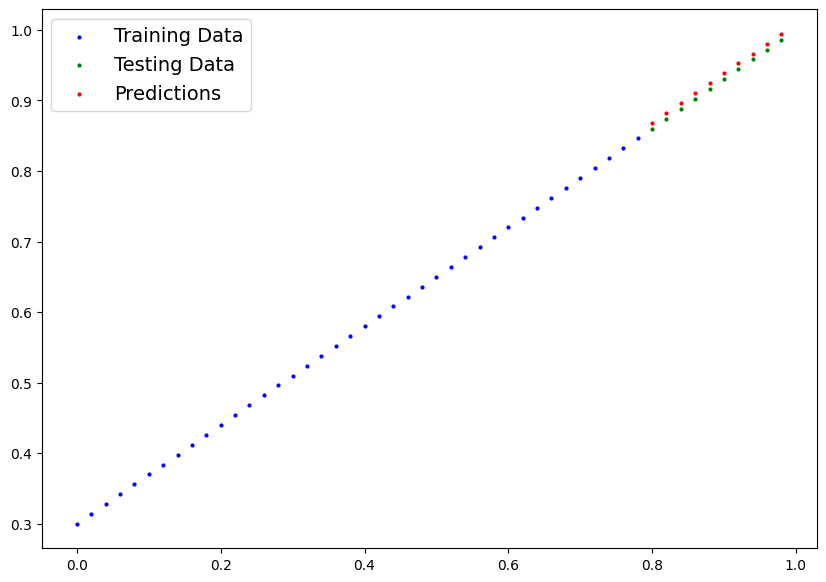

In [39]:
# An epoch is one loop through the data
# Increasing more epochs
epochs = 200 # A hyperparameter

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training loop
  model_0.train() # train mode in pytorch sets all paramaters that require gradients

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"loss : {loss}")

  # 3. optimizer zero grad : setting previous gradients to 0
  optimizer.zero_grad()

  # 4. Perform backpropagation (calculating gradients) on the loss with respect to all the parameters of the model having requires_grad = True
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero it by the above step 3 for the next iteration of the loop

  ## Testing
  model_0.eval() # turns off different settings in the model not needed for the evaluation/testing dropout, batch normalization layer)

  with torch.inference_mode(): # turns off gradient tracking and something more
  # with torch.no_grad() : in older pytorch codes, still valid , but above is preferred
    # 1. do the forward pass : that is nothing but test predictions
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch%10 == 0:
    print(f"epoch: {epoch} | Loss : {loss} | test loss: {test_loss}")

# print(model_0.state_dict())

with torch.inference_mode():
  y_pred_new_new_new = model_0(X_test)

plot_prediction(predictions=y_pred_new_new_new)

Notice one thing, trainging ko fir se karane pr, model training, pichli bar jhan tk hui thi, usi ke aage se continue ho gyi, puri nye sire se start nhi hui training.

Now this time , we will track values, and rename the model, so that nye sire se training start ho.

Everything from scratch and in one code

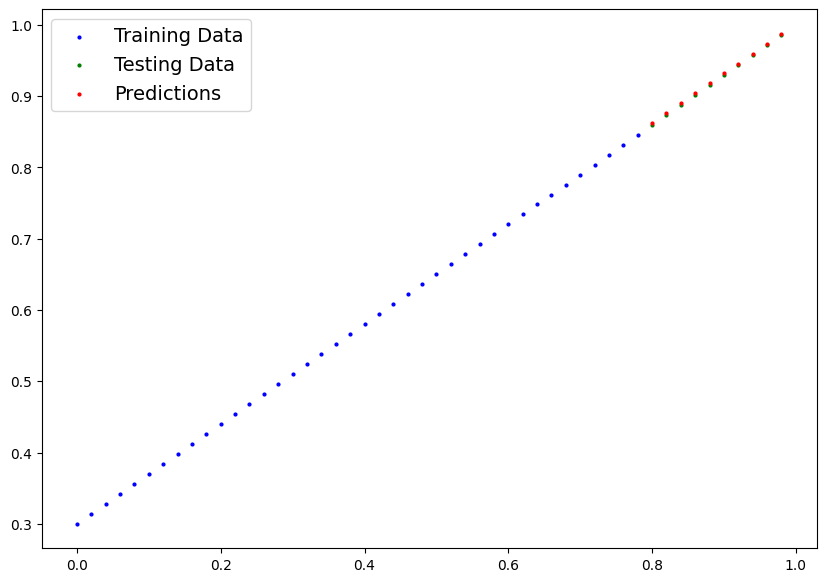

In [52]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# create *known* parmeters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # [4] => [4,1] dimension
Y = weight * X + bias

train_split = int(0.8 * len(X))
train_split

X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[ train_split : ], Y[ train_split : ]


# graph banane ke liye function
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):

  """
  plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")

  # Are thre prediction?
  if predictions is not None:
    # plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size" : 14})


# Create linear regression model class
class LinearRegressionModel(nn.Module): # class inherited from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,  # tensor of shape(1,) : One dimensional tensor with
                                           requires_grad = True, # by default true
                                           dtype = torch.float)) # by default = float = float32
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float32))

  # forward method to define the computation in the model
  def forward(self, x:torch.Tensor)-> torch.Tensor : # x is the input data
    return self.weights * x + self.bias # that is a simple linear regression


torch.manual_seed(4)

# create an instance of the model(this is a subclass of nn.Module)
model = LinearRegressionModel() # upar ke function se

# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer : try and error ADAM, SGD, etc : Adjust model parameters to reduce the loss
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.01)

# Training and testing loss viewer, with each epoch, how they are changing

# An epoch is one loop through the data
epochs = 2000 # A hyperparameter

# track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training loop
  model.train() # train mode in pytorch sets all paramaters that require gradients

  # 1. Forward Pass
  y_pred = model(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"loss : {loss}")

  # 3. optimizer zero grad : setting previous gradients to 0
  optimizer.zero_grad()

  # 4. Perform backpropagation (calculating gradients) on the loss with respect to all the parameters of the model having requires_grad = True
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero it by the above step 3 for the next iteration of the loop

  ## Testing
  model.eval() # turns off different settings in the model not needed for the evaluation/testing dropout, batch normalization layer)

  # to know with each epochs, how the test loss is decreasing:(for each epoch, it will run 10 times, that is the number of elements in test_set)
  with torch.inference_mode(): # turns off gradient tracking and something more
  # with torch.no_grad() : in older pytorch codes, still valid , but above is preferred
    # 1. do the forward pass : that is nothing but test predictions
    test_pred = model(X_test)

    # 2. calculate the loss
    test_loss = loss_fn(test_pred, y_test) # sum of L1loss on all the elements of the test set, not one by one, all in one for a particular epoch

  if epoch%10 == 0:
    epoch_count.append(epoch) # 200 values as 4000/10
    loss_values.append(loss) # training loss : 200 values , as 2000/10
    test_loss_values.append(test_loss) # 200 values as 2000/10


# After full training, getting predictions from the model
with torch.inference_mode():
  y_pred_on_test = model(X_test)

plot_prediction(predictions=y_pred_on_test)

In [60]:
test_loss_values[:10]

[tensor(2.1057),
 tensor(1.9730),
 tensor(1.8500),
 tensor(1.7374),
 tensor(1.6341),
 tensor(1.5396),
 tensor(1.4548),
 tensor(1.3776),
 tensor(1.3076),
 tensor(1.2442)]

In [54]:
len(test_loss_values)

200

In [55]:
len(loss_values)

200

In [56]:
len(epoch_count)

200

In [61]:
loss_values[:10]

[tensor(0.9666, grad_fn=<MeanBackward0>),
 tensor(0.8544, grad_fn=<MeanBackward0>),
 tensor(0.7596, grad_fn=<MeanBackward0>),
 tensor(0.6819, grad_fn=<MeanBackward0>),
 tensor(0.6178, grad_fn=<MeanBackward0>),
 tensor(0.5655, grad_fn=<MeanBackward0>),
 tensor(0.5235, grad_fn=<MeanBackward0>),
 tensor(0.4893, grad_fn=<MeanBackward0>),
 tensor(0.4614, grad_fn=<MeanBackward0>),
 tensor(0.4387, grad_fn=<MeanBackward0>)]

In [62]:
epoch_count[:10]

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

all elements in 2 list are tensors. Matplotlib can draw graph for numpy arrays not for tensors

In [67]:
import numpy as np
loss_values_np = [loss_item.detach().numpy() for loss_item in loss_values]
test_loss_np = [test_loss_item.detach().numpy() for test_loss_item in test_loss_values]

In [68]:
loss_values_np[:10]

[array(0.9665721, dtype=float32),
 array(0.85441124, dtype=float32),
 array(0.75959694, dtype=float32),
 array(0.6818595, dtype=float32),
 array(0.61775744, dtype=float32),
 array(0.56551516, dtype=float32),
 array(0.5234812, dtype=float32),
 array(0.4893191, dtype=float32),
 array(0.46138686, dtype=float32),
 array(0.4386722, dtype=float32)]

In [70]:
test_loss_np[:10]

[array(2.105739, dtype=float32),
 array(1.9730289, dtype=float32),
 array(1.8499696, dtype=float32),
 array(1.7374096, dtype=float32),
 array(1.6340523, dtype=float32),
 array(1.5395851, dtype=float32),
 array(1.454819, dtype=float32),
 array(1.3776479, dtype=float32),
 array(1.3076161, dtype=float32),
 array(1.244242, dtype=float32)]

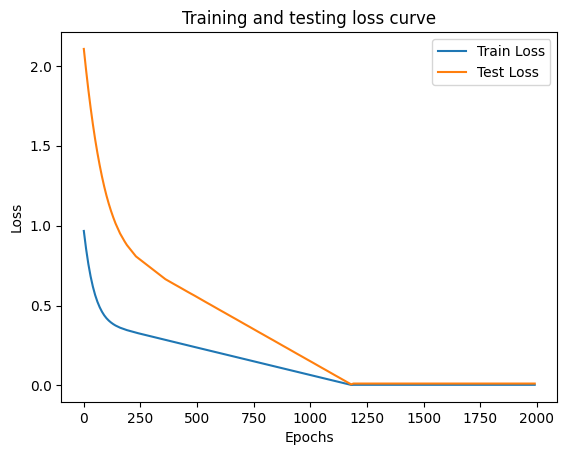

In [71]:
# plotting the loss curves
plt.plot(epoch_count, loss_values_np, label="Train Loss")
plt.plot(epoch_count, test_loss_np, label = "Test Loss")
plt.title("Training and testing loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

one way to keep track experiments.

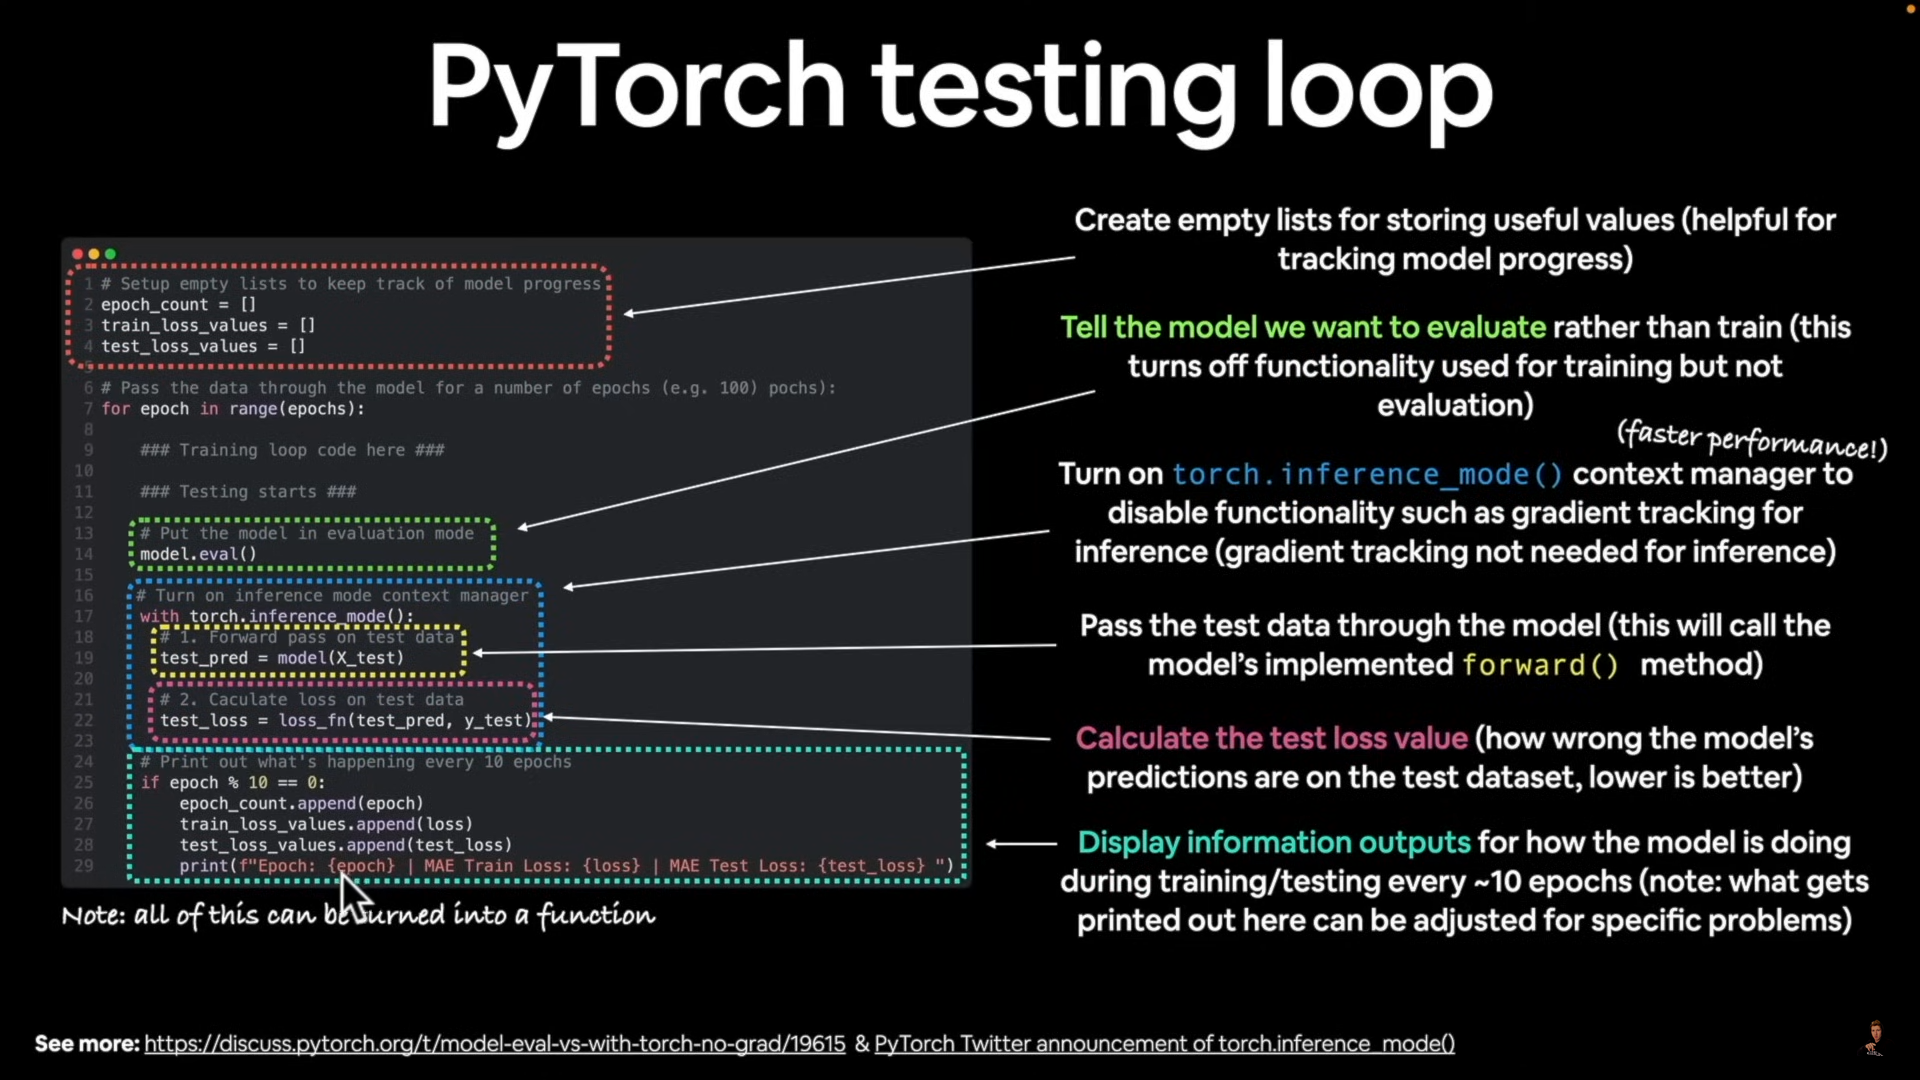

## Saving the model:
There are three main methods for saving and loading models in pytorch.

1. torch.save( ) - allows you save a PyTorch object in python pickle format
2. torch.load( ) - allows you load a saved PyTorch object
3. torch.nn.Module.load_state_dict( ) - this allows to load a model's saved state dictionary


In [72]:
model.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3052]))])

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 954x537 - 7h26m51s].png](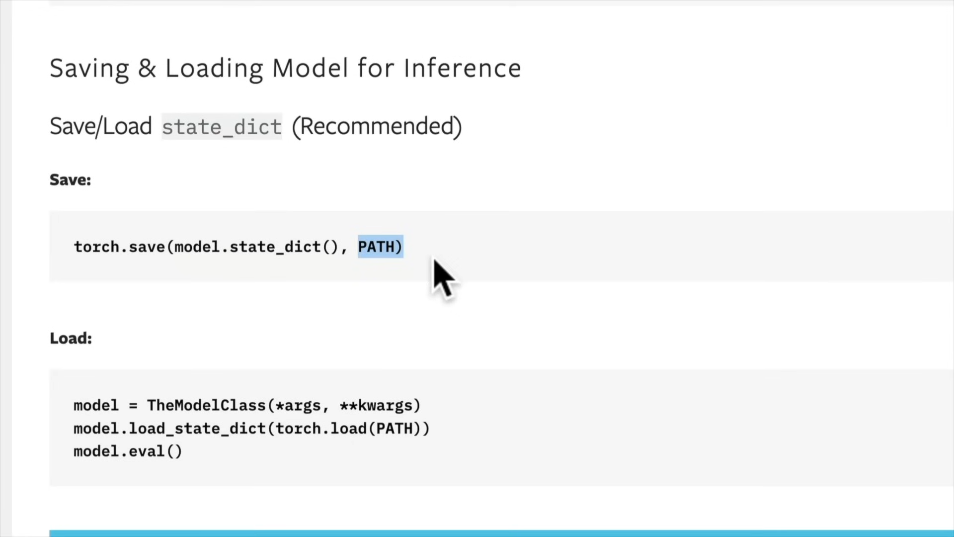)

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 954x537 - 7h27m47s].png](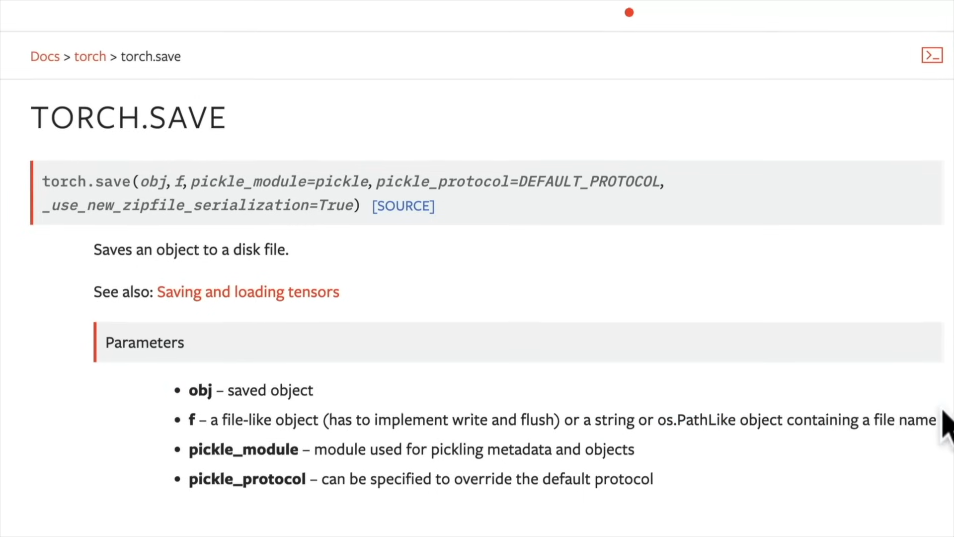)

In [75]:
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth" # a common convention is to save model using either .pt or .pth file extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. saving the model's state dict (recomonended)
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)


Saving model to models/01_pytorch_workflow_model.pth


Sure, let's break down the code and the methods for saving and loading models in PyTorch:

1. **torch.save():** This method allows you to save a PyTorch object (such as a model) in Python's pickle format. Pickle is a standard way of serializing Python objects into byte streams, and it's useful for saving and loading complex data structures.

2. **torch.load():** This method allows you to load a saved PyTorch object from a file. You can use it to load models, tensors, or any other PyTorch object that was saved using `torch.save()`.

3. **torch.nn.Module.load_state_dict():** This method allows you to load a model's saved state dictionary. The state dictionary contains all the learnable parameters of the model, such as weights and biases. You can use this method to initialize a model's parameters with the saved values.

Now, let's go through the provided code:

```python
from pathlib import Path

# Create a directory to save models
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Define the model name and save path
MODEL_NAME = "01_pytorch_workflow_model.pth"  # conventionally saved with .pt or .pth extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Saving the model's state dictionary (recommended)
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)
```

In this code snippet:

- We create a directory named "models" using `Pathlib`. This directory will be used to store saved models.
- We define the name of the model file as "01_pytorch_workflow_model.pth" and construct the full path to save the model using `Pathlib`.
- We use `torch.save()` to save the model's state dictionary (`model.state_dict()`) to the specified file (`MODEL_SAVE_PATH`).

By saving only the model's state dictionary, we separate the model architecture from its parameters. This makes it easier to reuse the model architecture and share the trained parameters with others. When loading the model, you can reconstruct the model architecture and then load the saved parameters using `load_state_dict()`.

Certainly, let's delve deeper into the differences between the three main methods for saving and loading models in PyTorch:

1. **torch.save() and torch.load():**

    - **Functionality:** These functions allow you to save and load entire PyTorch objects, including models, tensors, dictionaries, etc., in Python's pickle format.
    
    - **Usage:** You typically use `torch.save()` to save the entire model or any PyTorch object you want to persist, and `torch.load()` to load the saved object back into memory.
    
    - **Example:**
        ```python
        # Saving the entire model
        torch.save(model, MODEL_SAVE_PATH)
        
        # Loading the saved model
        loaded_model = torch.load(MODEL_SAVE_PATH)
        ```
    
    - **Advantages and Disadvantages:** The main advantage of using `torch.save()` and `torch.load()` is their simplicity and flexibility. They allow you to save and load any PyTorch object without having to worry about the internal structure. However, they may not be the most efficient way to save and load models, especially if you're only interested in the model's parameters and not its entire state.

2. **torch.nn.Module.load_state_dict():**

    - **Functionality:** This method allows you to load a model's saved state dictionary, which contains all the learnable parameters of the model (e.g., weights and biases).
    
    - **Usage:** After defining your model's architecture, you use `model.load_state_dict()` to initialize the model's parameters with the saved values from the state dictionary.
    
    - **Example:**
        ```python
        # Define model architecture
        model = MyModel()
        
        # Load the saved state dictionary
        model.load_state_dict(torch.load(MODEL_SAVE_PATH))
        ```
    
    - **Advantages and Disadvantages:** The main advantage of using `load_state_dict()` is that it separates the model architecture from its parameters. This makes it easier to share trained parameters with others or transfer them between different models with the same architecture. However, you need to make sure that the model architecture matches when loading the state dictionary, or else you may encounter errors.

In summary, `torch.save()` and `torch.load()` are more general-purpose methods for saving and loading PyTorch objects, while `load_state_dict()` is specifically designed for loading a model's parameters. Depending on your use case and requirements, you can choose the method that best suits your needs.

In [76]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1668 Mar  2 19:31 01_pytorch_workflow_model.pth


## Loading a PyTorch model

since we saved our model's state_dict() rather than the entire model, we will create a new instance of our model class and load the saved state_dict() into that

In [77]:
model.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3052]))])

In [78]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model = LinearRegressionModel() # this instance is a loaded version, not the trained version now

loaded_model.state_dict()

OrderedDict([('weights', tensor([2.2399])), ('bias', tensor([0.8473]))])

In [79]:
# Load the saved state_dict() of model. This will update the new instance with updated parameters
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [80]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3052]))])

good exactly same parameter as the training model had.

In [82]:
# Make some predictions with our loaded model
loaded_model.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds

tensor([[0.8622],
        [0.8761],
        [0.8900],
        [0.9040],
        [0.9179],
        [0.9318],
        [0.9457],
        [0.9597],
        [0.9736],
        [0.9875]])

In [85]:
# compare loaded model preds with original model preds
y_pred_on_test == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting everything all together
## Recreating Everything

In [41]:
  import torch
  from torch import nn
  import matplotlib.pyplot as plt

# Create device agnostic code
GPU ho to use it, otherwise use CPU

In [42]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

DATA

In [43]:
# create some data using the linear regression formula of y = w * X + b

In [44]:
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step)
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [45]:
X = X.unsqueeze(dim=1) # to make in form of Matrix.
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [46]:
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [47]:
X.shape

torch.Size([50, 1])

50 rows and 1 column, because of unsqueeze in dim = 1. y bhi apne aap x-jaisa ho gya.

In [48]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [49]:
# plot the data
# graph banane ke liye function
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):

  """
  plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing Data")

  # Are thre prediction?
  if predictions is not None:
    # plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size" : 14})

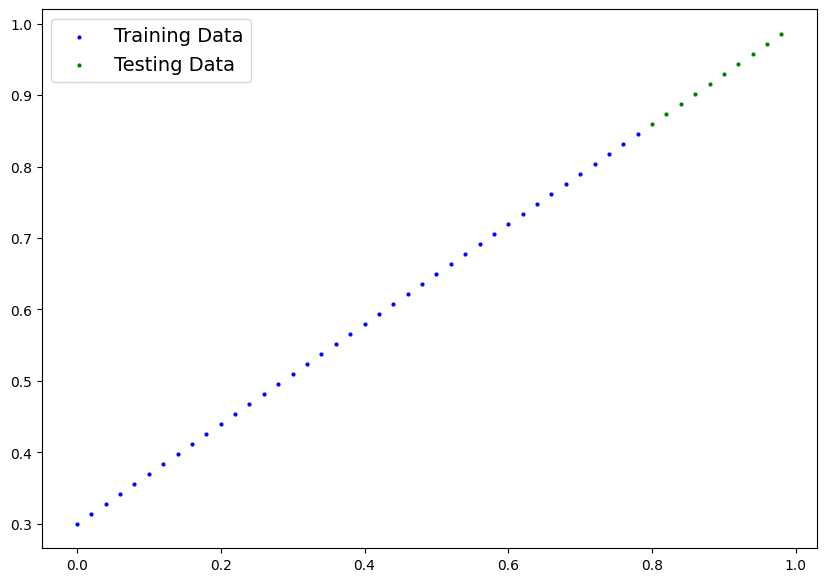

In [50]:
plot_prediction()

In [51]:
# building a PyTorch Linear Model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,out_features=1) # 1 input and 1 output.
    # this essentially is behind the scene it is creating the parameters for us.
    # you won't always initialize parameters of the models yourself
    # you generally initialize the layers, and then you use those layer in some forward computations.

  def forward(self, X:torch.Tensor) -> torch.tensor:
    return self.linear_layer(X)

# set the manual seed(42)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

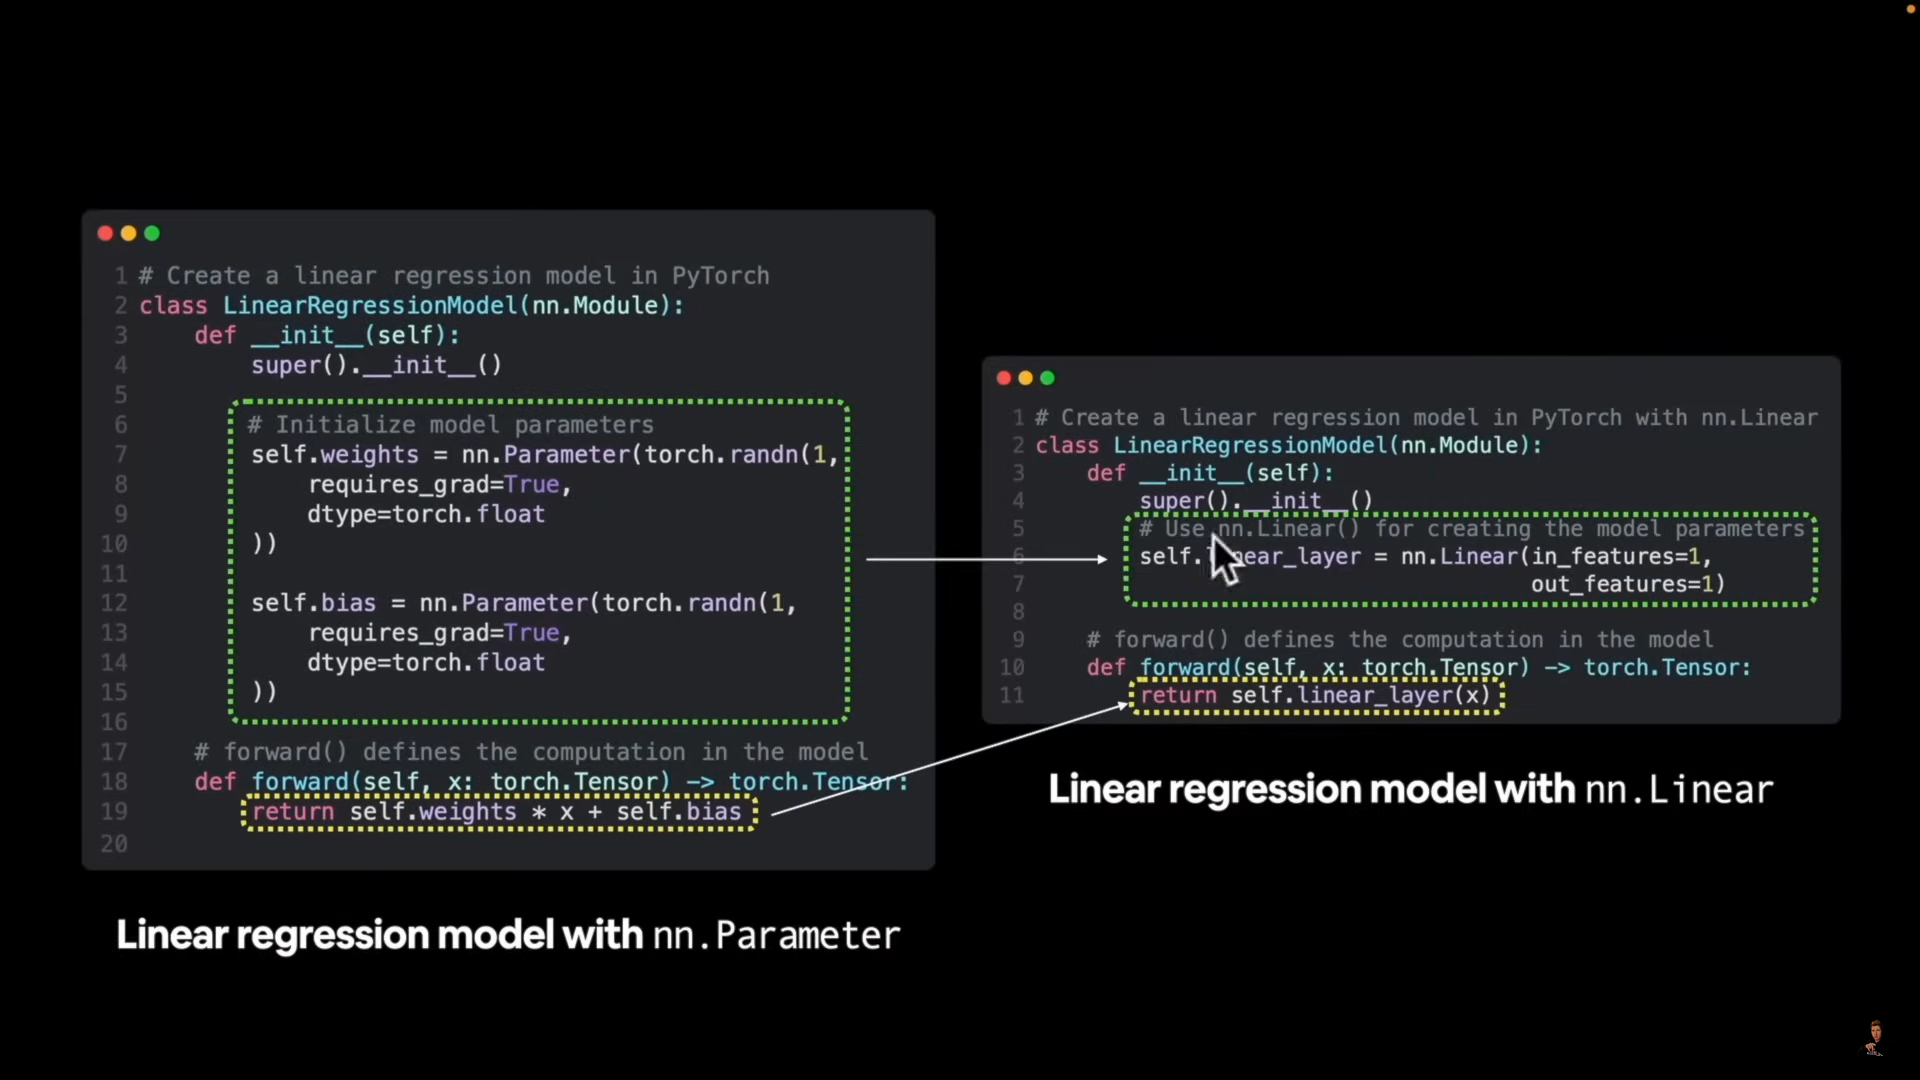

In [52]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [53]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device # if cuda won't be available, target device will be cpu only

device(type='cpu')

In [54]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

# Training

for training we need:
* loss function
* optimizer
* training loop
* testing loop


In [55]:
# Since we are in the regression DL problem, llet's set the loss function correspondingly
loss_fn = nn.L1Loss() # same as MAE

# Setup our Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.01)

In [56]:
# let's write a training loop
torch.manual_seed(42)

epochs = 200

# Putting the data on the target device (will be useful in case some data is on cpu, some is on gpu. To fix this) : btw here is not any such case
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zer_grad
  optimizer.zero_grad()

  # 4. Perform Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## let's include testing as well on each epoch just for our understading, it has nothing to do with model training, Also it is not part of validation split(of train, valid, test)
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # print what is happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.01380180753767

In [57]:
model_1.state_dict() # w and b generated by the model, very close to the real w and b used for data generation

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [58]:
weight, bias # we set before as ideal for data generation

(0.7, 0.3)

In [59]:
# makingand evaluating predictions
# turn the model into evaluation mode first
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

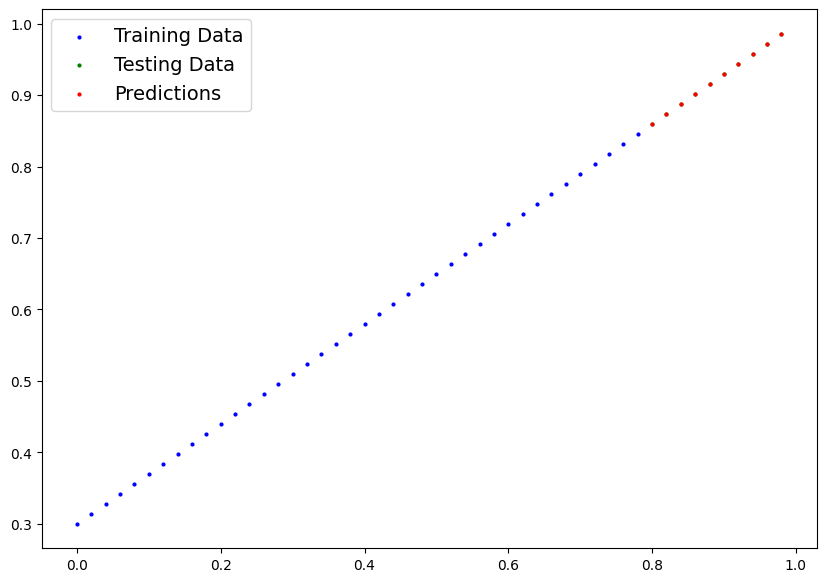

In [61]:
plot_prediction(predictions=y_preds)
# in case y_preds are on gpu use : plot_prediction(predictions=y_preds.cpu())

This is almost exact same predictions as the real values

Often times, hyperparameters are written in capital letters.

In [62]:
## Saving and loading our trained model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict:
torch.save(obj = model_1.state_dict(), f=MODEL_SAVE_PATH)
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_model_1.pth')

In [64]:
# Load a PyTorch model
loaded_model_1 = LinearRegressionModelV2() # need to create non-trained instance of the model class, to use already saved state_dict

# Load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# PUT THE TARGET MODEL TO THE DEVICE
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [65]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

Yes same values we have

In [66]:
# evaluate loaded model

loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])